C:\Users\frmar\AppData\Local\Temp\ipykernel_15504\3353990355.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


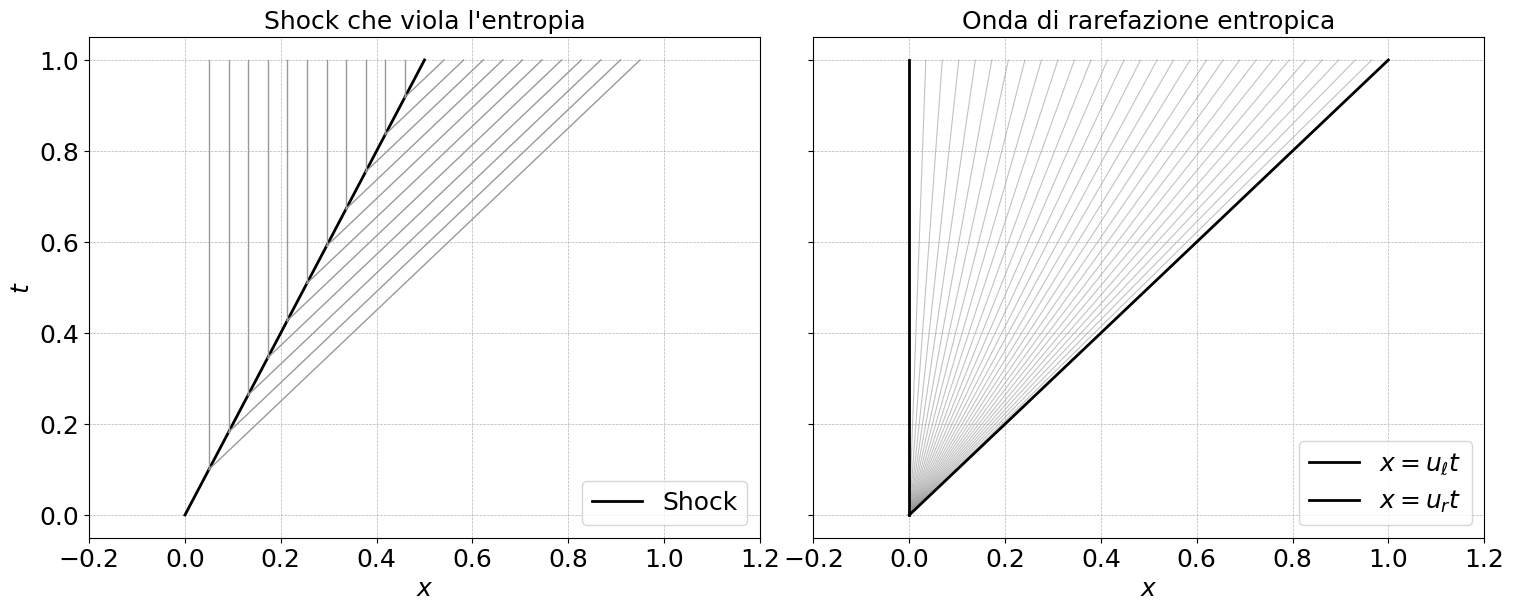

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Imposta la dimensione di default del font a 20 per tutti gli elementi
plt.rcParams.update({'font.size': 18})

# Funzione di flusso per l'equazione di Burgers
def f(u):
    return 0.5 * u**2

# Stati a sinistra, a destra e tempo finale
u_l, u_r = 0.0, 1.0
T = 1.0

# Velocità dello shock (Rankine–Hugoniot)
s = (f(u_r) - f(u_l)) / (u_r - u_l)

# Istanti di tempo per le caratteristiche
t_vals = np.linspace(0, T, 300)

# --- CREA I SUBPLOT CON PIÙ SPAZIO FRA LORO --- 
fig, axes = plt.subplots(
    1, 2, figsize=(18, 6.5), sharey=True,
    gridspec_kw={'wspace': 0.08}   # ← qui
)

# === 1) Shock non-entropico (entropy-violating) ===
ax0 = axes[0]
ax0.plot(s * t_vals, t_vals, color='black', linewidth=2, label='Shock')
t_shock = np.linspace(0.1, T, 12)
for t0 in t_shock:
    ax0.plot([s*t0]*2, [t0, T], color='0.6', linewidth=1)
    t_seg = np.linspace(t0, T, 50)
    x_seg = s*t0 + u_r * (t_seg - t0)
    ax0.plot(x_seg, t_seg, color='0.6', linewidth=1)
ax0.set_title("Shock che viola l'entropia", fontsize=18)
ax0.set_xlabel(r'$x$', fontsize=18)
ax0.set_ylabel(r'$t$', fontsize=18)
ax0.set_xlim(-0.2, u_r*T + 0.2)
ax0.grid(True, linestyle='--', linewidth=0.5, color='0.7')
ax0.legend(frameon=True, fontsize=18)
ax0.tick_params(labelsize=18)

# === 2) Soluzione a rarefazione (entropica) ===
ax1 = axes[1]
for ui in np.linspace(u_l, u_r, 30):
    ax1.plot(ui * t_vals, t_vals, color='0.6', linewidth=0.8, alpha=0.6)
ax1.plot(u_l * t_vals, t_vals, color='black', linewidth=2, label=r'$x = u_\ell t$')
ax1.plot(u_r * t_vals, t_vals, color='black', linewidth=2, label=r'$x = u_r t$')
ax1.set_title('Onda di rarefazione entropica', fontsize=18)
ax1.set_xlabel(r'$x$', fontsize=18)
ax1.set_xlim(-0.2, u_r*T + 0.2)
ax1.grid(True, linestyle='--', linewidth=0.5, color='0.7')
ax1.legend(frameon=True, fontsize=18)
ax1.tick_params(labelsize=18)

plt.tight_layout()
plt.show()



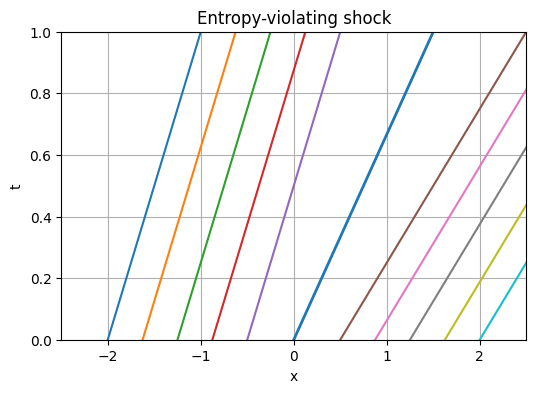

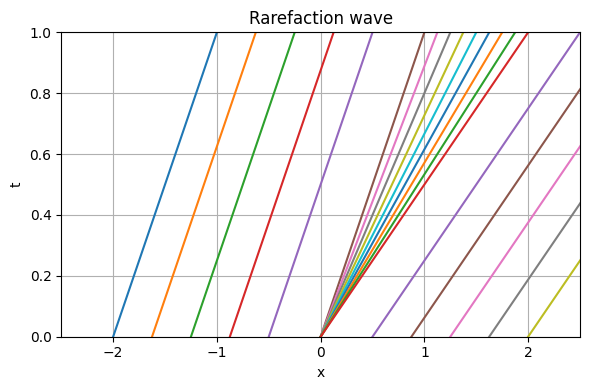

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
u_l = 1.0
u_r = 2.0
f = lambda u: 0.5 * u**2
f_prime = lambda u: u
s = (f(u_r) - f(u_l)) / (u_r - u_l)

# Time vector
t_max = 1.0
t = np.linspace(0, t_max, 200)

# 1) Entropy-violating shock
plt.figure(figsize=(6, 4))
# Left-region characteristics
x0_left = np.linspace(-2, -0.5, 5)
for x0 in x0_left:
    plt.plot(x0 + f_prime(u_l) * t, t)
# Right-region characteristics
x0_right = np.linspace(0.5, 2, 5)
for x0 in x0_right:
    plt.plot(x0 + f_prime(u_r) * t, t)
# Shock line
plt.plot(s * t, t, linewidth=2)
plt.title("Entropy-violating shock")
plt.xlabel("x")
plt.ylabel("t")
plt.ylim(0, t_max)
plt.xlim(-2.5, 2.5)
plt.grid(True)

# 2) Rarefaction wave
plt.figure(figsize=(6, 4))
# Left-region characteristics
for x0 in x0_left:
    plt.plot(x0 + f_prime(u_l) * t, t)
# Fan characteristics from x=0
u_vals = np.linspace(u_l, u_r, 9)
for u in u_vals:
    plt.plot(f_prime(u) * t, t)
# Right-region characteristics
for x0 in x0_right:
    plt.plot(x0 + f_prime(u_r) * t, t)
plt.title("Rarefaction wave")
plt.xlabel("x")
plt.ylabel("t")
plt.ylim(0, t_max)
plt.xlim(-2.5, 2.5)
plt.grid(True)

plt.tight_layout()
plt.show()


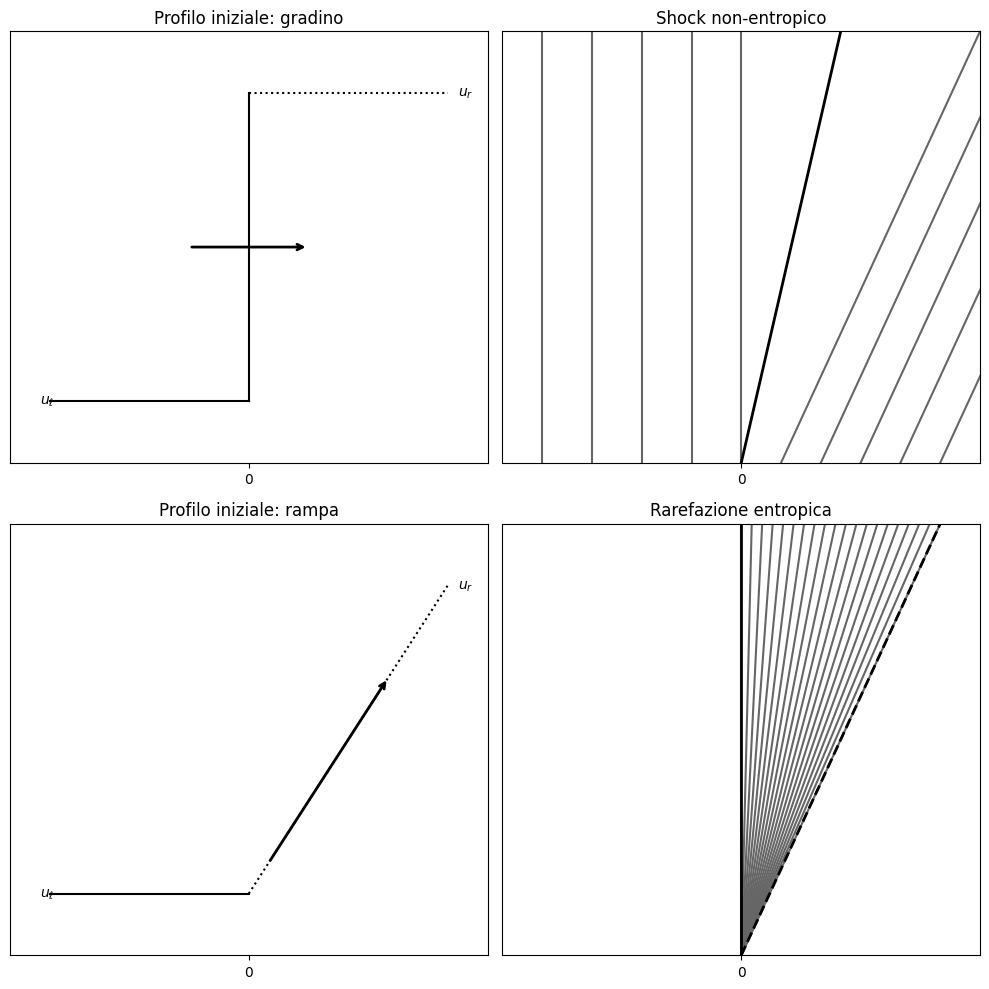

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Stati e tempo massimo
u_l, u_r = 0.0, 1.0
T = 1.0

# Calcolo della velocità di shock
s = (0.5*u_r**2 - 0.5*u_l**2) / (u_r - u_l)

# Istanti di tempo per le caratteristiche
t = np.linspace(0, T, 200)

# Creazione della figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# --- 1) Profilo iniziale a gradino (shock) ---
ax = axes[0, 0]
ax.plot([-1, 0], [u_l, u_l], 'k-')                   # u=u_l per x<0
ax.plot([0, 0], [u_l, u_r], 'k-')                     # salto
ax.plot([0, 1], [u_r, u_r], 'k:')                     # u=u_r per x>0 (tratteggiato)
ax.annotate('', xy=(0.3, 0.5), xytext=(-0.3, 0.5),
            arrowprops=dict(arrowstyle='->', lw=2))
ax.text(-1.05, u_l, r'$u_\ell$', va='center')
ax.text(1.05, u_r, r'$u_r$', va='center')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xticks([0])
ax.set_yticks([])
ax.set_title('Profilo iniziale: gradino')

# --- 2) Diagramma caratteristiche (shock non-entropico) ---
ax = axes[0, 1]
# caratteristiche a sinistra (velocità u_l=0)
for x0 in np.linspace(-1, 0, 5):
    ax.plot([x0, x0], [0, T], color='0.4')
# caratteristiche a destra (velocità u_r)
for x0 in np.linspace(0.2, 1, 5):
    ax.plot(x0 + u_r*t, t, color='0.4')
# linea di shock
ax.plot(s*t, t, 'k-', linewidth=2)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(0, T)
ax.set_xticks([0])
ax.set_yticks([])
ax.set_title('Shock non-entropico')

# --- 3) Profilo iniziale a rampa (rarefazione) ---
ax = axes[1, 0]
ax.plot([-1, 0], [u_l, u_l], 'k-')                   # u=u_l per x<0
ax.plot([0, 1], [u_l, u_r], 'k:')                     # rampa tratteggiata
ax.annotate('', xy=(0.7, 0.7), xytext=(0.1, 0.1),
            arrowprops=dict(arrowstyle='->', lw=2))
ax.text(-1.05, u_l, r'$u_\ell$', va='center')
ax.text(1.05, u_r, r'$u_r$', va='center')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xticks([0])
ax.set_yticks([])
ax.set_title('Profilo iniziale: rampa')

# --- 4) Diagramma caratteristiche (rarefazione entropica) ---
ax = axes[1, 1]
# ventaglio di caratteristiche
for ui in np.linspace(u_l, u_r, 20):
    ax.plot(ui*t, t, color='0.4')
# bordi fan
ax.plot(u_l*t, t, 'k-', linewidth=2)
ax.plot(u_r*t, t, 'k--', linewidth=2)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(0, T)
ax.set_xticks([0])
ax.set_yticks([])
ax.set_title('Rarefazione entropica')

# Layout finale
plt.tight_layout()
plt.show()
